# Pandas 

일반적으로 각 패키지는 pd, np, plt라는 이름으로 불러온다.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Object Creation (객체 생성)

pandas는 값을 가지고 있는 리스트를 통해 series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러올 것이다.

In [ ]:
s = pd. Series([1,3,4,np.nan,9,8])
s

0    1.0
1    3.0
2    4.0
3    NaN
4    9.0
5    8.0
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만든다.

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.092341,-0.450261,0.367813,0.813462
2013-01-02,-0.259564,0.444768,0.217988,-0.218826
2013-01-03,-0.562367,1.347180,-0.217952,-0.609495
2013-01-04,-1.307470,0.494650,1.218323,1.020725
2013-01-05,1.200182,1.063413,-0.823259,1.319964
2013-01-06,0.232605,-1.285717,-0.797968,0.449817


Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만든다.

In [ ]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


데이터프레임 결과물의 열은 다양한 데이터 타입 (dtypes)으로 구성된다.

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

IPython을 이용하고 있다면 (공용 속성을 포함한) 열 이름에 대한 Tap 자동완성 기능이 자동으로 활성화 된다. 다음은 완성될 속성에 대한 부분집합 (subset)이다.

역자 주 : 아래 제시된 코드의 경우, IPython이 아닌 환경 (Google Colaboratory, Jupyter 등)에서는 사용이 불가능한 코드인 점에 주의한다.

In [ ]:
# df2.<TAB>

## 2. Viewing Data (데이터 확인하기)

데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때에 사용하는 방법은 다음과 같다.

역자 주: 괄호() 안에는 숫자가 들어갈 수도 있고 안 들어갈 수도 있다. 숫자가 들어간다면, 윗 / 마지막 줄의 특정 줄을 불러올 수 있다. 숫자가 들어가지 않다면, 기본값인 5로 처리된다.

예시

In [ ]:
df.tail()  # 끝에서 마지막 5줄 불러옴
df.head() # 앞에서 5줄 불러옴

,A,B,C,D
2013-01-01,1.047063,0.472251,-0.886721,1.959561
2013-01-02,0.392131,1.055226,1.192205,-1.323171
2013-01-03,0.200696,0.414275,0.190812,0.185149
2013-01-04,-0.770361,-0.917366,0.904097,0.256496
2013-01-05,-0.759546,1.008527,2.167210,1.761440


In [ ]:
df.tail(3) # 끝에서 마지막 3줄을 불러옴, ()안의 숫자는 표시할 데이터의 수를 의미

,A,B,C,D
2013-01-04,-0.514383,-1.763194,0.454993,1.244137
2013-01-05,-0.074217,1.905904,0.954576,-1.548098
2013-01-06,0.266077,0.811469,0.236836,-1.103073


인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보를 본다.

In [ ]:
df.index # 위치 값을 뜻함, 국어사전 옆면에 ㄱ, ㄴ, ㄷ으로 표시해 놓은 것과 비슷

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.values

array([[ 0.09234115, -0.45026089,  0.3678134 ,  0.81346197],
       [-0.25956433,  0.44476786,  0.21798796, -0.21882572],
       [-0.56236719,  1.3471799 , -0.21795237, -0.60949467],
       [-1.30746978,  0.49464952,  1.21832335,  1.0207252 ],
       [ 1.20018179,  1.06341282, -0.82325933,  1.31996414],
       [ 0.23260539, -1.28571662, -0.79796781,  0.44981732]])

describe()는 데이터의 대략적인 통계적 정보 요약을 보여준다.

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.100712,0.269005,-0.005842,0.462608
std,0.840871,0.980801,0.778322,0.746133
min,-1.307470,-1.285717,-0.823259,-0.609495
25%,-0.486666,-0.226504,-0.652964,-0.051665
50%,-0.083612,0.469709,0.000018,0.631640
75%,0.197539,0.921222,0.330357,0.968909
max,1.200182,1.347180,1.218323,1.319964


데이터를 전치한다.

In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.092341,-0.259564,-0.562367,-1.307470,1.200182,0.232605
B,-0.450261,0.444768,1.347180,0.494650,1.063413,-1.285717
C,0.367813,0.217988,-0.217952,1.218323,-0.823259,-0.797968
D,0.813462,-0.218826,-0.609495,1.020725,1.319964,0.449817


축 별로 정렬합니다.

In [ ]:
df.sort_index(axis=1, ascending=False) # axis가 0이면 x축, 1이면 y축

,D,C,B,A
2013-01-01,1.959561,-0.886721,0.472251,1.047063
2013-01-02,-1.323171,1.192205,1.055226,0.392131
2013-01-03,0.185149,0.190812,0.414275,0.200696
2013-01-04,0.256496,0.904097,-0.917366,-0.770361
2013-01-05,1.761440,2.167210,1.008527,-0.759546
2013-01-06,-0.394987,-0.149415,-1.075745,-0.622170


값 별로 정렬한다.

In [ ]:
df.sort_values(by='B') # by는 데이터를 뜻함

,A,B,C,D
2013-01-06,0.232605,-1.285717,-0.797968,0.449817
2013-01-01,0.092341,-0.450261,0.367813,0.813462
2013-01-02,-0.259564,0.444768,0.217988,-0.218826
2013-01-04,-1.307470,0.494650,1.218323,1.020725
2013-01-05,1.200182,1.063413,-0.823259,1.319964
2013-01-03,-0.562367,1.347180,-0.217952,-0.609495


## 3. Selection(선택)

Note : 선택과 설정을 위한 Python / Numpy의 표준화된 표현들이 직관적이며, 코드 작성을 위한 양방향 작업에 유용하지만 우리는 Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc 을 추천한다.

**Getting (데이터 얻기)**

df.A 와 동일한 Series를 생성하는 단일 열을 선택합니다.

In [ ]:
df['A'] 

2013-01-01    0.092341
2013-01-02   -0.259564
2013-01-03   -0.562367
2013-01-04   -1.307470
2013-01-05    1.200182
2013-01-06    0.232605
Freq: D, Name: A, dtype: float64

행을 분할하는 [ ]를 통해 선택한다.

In [ ]:
df[0:3] # 0~2행을 지정, 지정한 행의 -1

,A,B,C,D
2013-01-01,1.047063,0.472251,-0.886721,1.959561
2013-01-02,0.392131,1.055226,1.192205,-1.323171
2013-01-03,0.200696,0.414275,0.190812,0.185149


In [ ]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.259564,0.444768,0.217988,-0.218826
2013-01-03,-0.562367,1.347180,-0.217952,-0.609495
2013-01-04,-1.307470,0.494650,1.218323,1.020725


**Selection by Label (Label 을 통한 선택)**

라벨을 사용하여 횡단면을 얻는다.

In [ ]:
df.loc[dates[0]] #데이터의 0행을 선택

A    0.092341
B   -0.450261
C    0.367813
D    0.813462
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축 (의 데이터)을 얻는다.

In [ ]:
df.loc[:,['A','B']] # loc의 첫번째는 행에 대한 정보, 두번째는 열에 대한 정보를 입력
# 모든 행은 :로 표시하고 쉼표(,)를 입력하고 열명을 입력하면 해당 열만 가져옴

,A,B
2013-01-01,0.092341,-0.450261
2013-01-02,-0.259564,0.444768
2013-01-03,-0.562367,1.347180
2013-01-04,-1.307470,0.494650
2013-01-05,1.200182,1.063413
2013-01-06,0.232605,-1.285717


양쪽 종단점을 포함한 라벨 슬라이싱을 본다.

In [ ]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,-0.259564,0.444768
2013-01-03,-0.562367,1.347180
2013-01-04,-1.307470,0.494650


반환되는 객체의 차원를 줄인다.

In [ ]:
df.loc['20130102',['A','B']]

A   -0.259564
B    0.444768
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻는다. # 스칼라: 변하지 않는 값

In [ ]:
df.loc[dates[0],'A']

0.0923411461119207

스칼라 값을 더 빠르게 구하는 방법이다. (앞선 메소드와 동일하다.)

In [ ]:
df.at[dates[0],'A']

0.0923411461119207

**Selection by Position (위치로 선택하기)**

넘겨받은 정수의 위치를 기준으로 선택한다.

In [ ]:
df.iloc[3]

A   -1.307470
B    0.494650
C    1.218323
D    1.020725
Name: 2013-01-04 00:00:00, dtype: float64

정수로 표기된 슬라이스들을 통해, numpy / python과 유사하게 작동한다.

In [ ]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.770361,-0.917366
2013-01-05,-0.759546,1.008527


정수로 표기된 위치값의 리스트들을 통해, numpy / python의 스타일과 유사해진다.

In [ ]:
df.iloc[[1,2,4],[0,2]] # []안의 앞쪽[]은 행을 뒤쪽[]은 열 ex)앞은 날짜, 뒤는 A,B...

,A,C
2013-01-02,-0.259564,0.217988
2013-01-03,-0.562367,-0.217952
2013-01-05,1.200182,-0.823259


명시적으로 행을 나누고자 하는 경우다.

In [ ]:
df.iloc[1:3,:] # 1:3은 1~2열, 뒤에 :은 모든열 표시

,A,B,C,D
2013-01-02,0.392131,1.055226,1.192205,-1.323171
2013-01-03,0.200696,0.414275,0.190812,0.185149


명시적으로 열을 나누고자 하는 경우다.

In [ ]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.450261,0.367813
2013-01-02,0.444768,0.217988
2013-01-03,1.347180,-0.217952
2013-01-04,0.494650,1.218323
2013-01-05,1.063413,-0.823259
2013-01-06,-1.285717,-0.797968


명시적으로 (특정한) 값을 얻고자 하는 경우다.

In [ ]:
df.iloc[1,1]

0.44476785818328807

스칼라 값을 빠르게 얻는 방법이다. (위의 방식과 동일하다.)

In [ ]:
df.iat[1,1]

0.44476785818328807

**Boolean Indexing**

데이터를 선택하기 위해 단일 열의 값을 사용한다.

In [ ]:
df[df.A > 0] # df[데이터, 0보다큰 A열을 표시]

,A,B,C,D
2013-01-01,0.092341,-0.450261,0.367813,0.813462
2013-01-05,1.200182,1.063413,-0.823259,1.319964
2013-01-06,0.232605,-1.285717,-0.797968,0.449817


Boolean 조건을 충족하는 데이터프레임에서 값을 선택한다.

In [ ]:
df[df > 0] # 결측값은 NaN으로 표기

,A,B,C,D
2013-01-01,0.092341,NaN,0.367813,0.813462
2013-01-02,NaN,0.444768,0.217988,NaN
2013-01-03,NaN,1.347180,NaN,NaN
2013-01-04,NaN,0.494650,1.218323,1.020725
2013-01-05,1.200182,1.063413,NaN,1.319964
2013-01-06,0.232605,NaN,NaN,0.449817


필터링을 위한 메소드 isin()을 사용한다.

In [ ]:
df2 = df.copy() # E 값에 데이터를 삽입
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.092341,-0.450261,0.367813,0.813462,one
2013-01-02,-0.259564,0.444768,0.217988,-0.218826,one
2013-01-03,-0.562367,1.347180,-0.217952,-0.609495,two
2013-01-04,-1.307470,0.494650,1.218323,1.020725,three
2013-01-05,1.200182,1.063413,-0.823259,1.319964,four
2013-01-06,0.232605,-1.285717,-0.797968,0.449817,three


In [ ]:
df2[df2['E'].isin(['two','four'])] # 위의 값에서 'two,four'을 필터함

,A,B,C,D,E
2013-01-03,-0.562367,1.347180,-0.217952,-0.609495,two
2013-01-05,1.200182,1.063413,-0.823259,1.319964,four


**Setting (설정)**

새 열을 설정하면 데이터가 인덱스 별로 자동 정렬된다.

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df['F'] = s1

라벨에 의해 값을 설정한다.

In [ ]:
df.at[dates[0],'A'] = 0

위치에 의해 값을 설정한다.

In [ ]:
df.iat[0,1] = 0

Numpy 배열을 사용한 할당에 의해 값을 설정한다.

In [ ]:
df.loc[:,'D'] = np.array([5] * len(df))

위 설정대로 작동한 결과이다.

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.367813,5,NaN
2013-01-02,-0.259564,0.444768,0.217988,5,1.0
2013-01-03,-0.562367,1.347180,-0.217952,5,2.0
2013-01-04,-1.307470,0.494650,1.218323,5,3.0
2013-01-05,1.200182,1.063413,-0.823259,5,4.0
2013-01-06,0.232605,-1.285717,-0.797968,5,5.0


where 연산을 설정한다.

In [ ]:
df2 = df.copy() # 얕은 복사
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.367813,-5,NaN
2013-01-02,-0.259564,-0.444768,-0.217988,-5,-1.0
2013-01-03,-0.562367,-1.347180,-0.217952,-5,-2.0
2013-01-04,-1.307470,-0.494650,-1.218323,-5,-3.0
2013-01-05,-1.200182,-1.063413,-0.823259,-5,-4.0
2013-01-06,-0.232605,-1.285717,-0.797968,-5,-5.0


## 4. Missing Data (결측치)

Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용한다. 이 방법은 기본 설정값이지만 계산에는 포함되지 않는다. Missing data section을 참조하자.

Reindexing으로 지정된 축 상의 인덱스를 변경 / 추가 / 삭제할 수 있다. Reindexing은 데이터의 복사본을 반환한다.

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1 # reindex는 index값을 새로 입히는 것, columns는 열 + E

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.367813,-5,NaN,1.0
2013-01-02,-0.259564,-0.444768,-0.217988,-5,-1.0,1.0
2013-01-03,-0.562367,-1.347180,-0.217952,-5,-2.0,NaN
2013-01-04,-1.307470,-0.494650,-1.218323,-5,-3.0,NaN


결측치를 가지고 있는 행들을 지운다.

In [ ]:
df1.dropna(how='any') # dropna는 결측값있는 행,열 지움
# how=any는 하나 이상의 NA 또는 모든 NA가있는 경우 DataFrame에서 행 또는 열이 제거
# 'any': NA 값이있는 경우 해당 행 또는 열을 삭제
# 'all': 모든 값이 NA이면 해당 행 또는 열을 삭제

,A,B,C,D,F,E
2013-01-02,-0.259564,-0.444768,-0.217988,-5,-1.0,1.0


결측치를 채워 넣는다.

In [ ]:
df1.fillna(value=5) #fillna은 결측값을 value의 값으로 변경해줌

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.367813,-5,3.0,1.0
2013-01-02,-0.259564,-0.444768,-0.217988,-5,-1.0,1.0
2013-01-03,-0.562367,-1.347180,-0.217952,-5,-2.0,3.0
2013-01-04,-1.307470,-0.494650,-1.218323,-5,-3.0,3.0


nan인 값에 boolean을 통한 표식을 얻는다.

역자 주 : 데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수이다.

In [ ]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 5. Operation (연산)
이진 (Binary) 연산의 기본 섹션을 참조하자.

Stats (통계)
일반적으로 결측치를 제외한 후 연산된다.

기술통계를 수행한다.

In [ ]:
df.mean()

A   -0.593698
B   -0.772621
C   -0.607217
D   -5.000000
F   -3.000000
dtype: float64

다른 축에서 동일한 연산을 수행합니다.

In [ ]:
df.mean(1)

2013-01-01   -1.341953
2013-01-02   -1.384464
2013-01-03   -1.825500
2013-01-04   -2.204089
2013-01-05   -2.417371
2013-01-06   -2.463258
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산해보겠다. 또한, pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅된다.

역자 주 : broadcast란 numpy에서 유래한 용어로, n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것을 의미한다.

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s # shift는 적용될 열을 뒤로 미룸 ex) shift(1)은 열이 1 뒤로 밀림

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.562367,-2.347180,-1.217952,-6.0,-3.0
2013-01-04,-4.307470,-3.494650,-4.218323,-8.0,-6.0
2013-01-05,-6.200182,-6.063413,-5.823259,-10.0,-9.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


**Apply (적용)**

데이터에 함수를 적용한다.

In [ ]:
df.apply(np.cumsum) # Pandas Dataframe(데이터프레임, 2차원),Pandas Series(시리즈, 1차원) 타입의 객체에서 호출

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.367813,-5,NaN
2013-01-02,-0.259564,-0.444768,-0.585801,-10,-1.0
2013-01-03,-0.821932,-1.791948,-0.803754,-15,-3.0
2013-01-04,-2.129401,-2.286597,-2.022077,-20,-6.0
2013-01-05,-3.329583,-3.350010,-2.845336,-25,-10.0
2013-01-06,-3.562188,-4.635727,-3.643304,-30,-15.0


In [ ]:
df.apply(lambda x: x.max() - x.min())

A    1.307470
B    1.347180
C    1.000371
D    0.000000
F    4.000000
dtype: float64

**Histogramming (히스토그래밍)**

더 많은 내용은 Histogramming and Discretization (히스토그래밍과 이산화) 항목을 참조한다.

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s # 앞열는 10-1=9, 뒷열은 0~6까지 노출, random 노출

0    0
1    1
2    0
3    7
4    5
5    0
6    0
7    5
8    7
9    0
dtype: int64

In [ ]:
s.value_counts() # s의 출력값의 합계

0    5
7    2
5    2
1    1
dtype: int64

**String Methods (문자열 메소드)**

Series는 다음의 코드와 같이 문자열 처리 메소드 모음 (set)을 가지고 있다.
이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있다.

문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용하며, 몇몇 경우에는 항상 정규 표현식을 사용함에 유의한다.

좀 더 자세한 내용은 벡터화된 문자열 메소드 부분에서 확인할 수 있다.

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 6. Merge (병합)

**Concat (연결)**

결합 (join) / 병합 (merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공한다.

concat()으로 pandas 객체를 연결한다.

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.136401,-1.352997,-0.549367,1.944215
1,0.704123,-0.178605,-0.563934,0.651202
2,0.211359,-1.391083,-2.064767,0.247274
3,-0.726841,-0.859549,-0.944753,0.405245
4,0.497332,0.822376,-1.379572,-1.352395
5,-0.141321,-0.696063,-0.639915,1.109966
6,0.555645,-0.952109,0.494846,0.745689
7,0.222887,0.418449,-0.079091,0.569133
8,0.704490,0.420243,-0.334890,-0.824163
9,-1.920083,0.913042,-1.322170,1.225016


In [ ]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.136401,-1.352997,-0.549367,1.944215
1,0.704123,-0.178605,-0.563934,0.651202
2,0.211359,-1.391083,-2.064767,0.247274
3,-0.726841,-0.859549,-0.944753,0.405245
4,0.497332,0.822376,-1.379572,-1.352395
5,-0.141321,-0.696063,-0.639915,1.109966
6,0.555645,-0.952109,0.494846,0.745689
7,0.222887,0.418449,-0.079091,0.569133
8,0.704490,0.420243,-0.334890,-0.824163
9,-1.920083,0.913042,-1.322170,1.225016


**Join (결합)**

SQL 방식으로 병합한다. 데이터베이스 스타일 결합 부분을 참고하자.

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [ ]:
right

,key,rval
0,foo,4
1,foo,5


In [ ]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


다른 예시이다.

In [ ]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [ ]:
right

,key,rval
0,foo,4
1,bar,5


In [ ]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


**Append (추가)**

데이터프레임에 행을 추가합니다. Appending 부분을 참조하자.

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,2.262304,-0.936471,-0.838484,0.091542
1,0.206970,0.942812,-0.819864,1.360690
2,0.607245,0.257755,0.550164,0.832045
3,-0.600805,-1.357533,-0.154043,-0.438323
4,0.116902,1.272746,-0.819159,0.512814
5,0.521093,0.549012,-1.380373,-0.139004
6,0.386905,-0.151209,-0.611924,-0.909454
7,-2.334515,-1.454128,-0.385081,1.360522


In [ ]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,2.262304,-0.936471,-0.838484,0.091542
1,0.206970,0.942812,-0.819864,1.360690
2,0.607245,0.257755,0.550164,0.832045
3,-0.600805,-1.357533,-0.154043,-0.438323
4,0.116902,1.272746,-0.819159,0.512814
5,0.521093,0.549012,-1.380373,-0.139004
6,0.386905,-0.151209,-0.611924,-0.909454
7,-2.334515,-1.454128,-0.385081,1.360522
8,-0.600805,-1.357533,-0.154043,-0.438323


## 7. Grouping (그룹화)

그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킨다.

- 몇몇 기준에 따라 여러 그룹으로 데이터를 분할 (splitting)
- 각 그룹에 독립적으로 함수를 적용 (applying)
- 결과물들을 하나의 데이터 구조로 결합 (combining)
자세한 내용은 그룹화 부분을 참조하자.

In [ ]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,-0.501522,0.363505
1,bar,one,0.764913,0.895876
2,foo,two,1.228513,-0.130657
3,bar,three,0.756878,-0.769391
4,foo,two,1.261262,1.544167
5,bar,two,-0.626006,1.697998
6,foo,one,-1.408679,-0.062063
7,foo,three,-0.593102,-0.239886


생성된 데이터프레임을 그룹화한 후 각 그룹에 sum() 함수를 적용한다.

In [ ]:
df.groupby('A').sum()

,C,D
A,,
bar,0.895785,1.824483
foo,-0.013527,1.475065


여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성된다. 여기에도 sum 함수를 적용할 수 있다.

In [ ]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.764913  0.895876
    three  0.756878 -0.769391
    two   -0.626006  1.697998
foo one   -1.910200  0.301442
    three -0.593102 -0.239886
    two    2.489776  1.413509

## 8. Reshaping (변형)
계층적 인덱싱 및 변형 부분을 참조하자.

**Stack (스택)**

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2  =  df[:4]
df2

A         B
first second                    
bar   one     1.162539  0.476312
      two     1.469296  0.058747
baz   one    -0.335823 -0.088311
      two     0.241533 -1.326298

stack() 메소드는 데이터프레임 열들의 계층을 “압축”한다.

In [ ]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.162539
               B    0.476312
       two     A    1.469296
               B    0.058747
baz    one     A   -0.335823
               B   -0.088311
       two     A    0.241533
               B   -1.326298
dtype: float64

“Stack된” 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, stack()의 역 연산은 unstack()이며, 기본적으로 마지막 계층을 unstack한다.

In [ ]:
stacked.unstack()

A         B
first second                    
bar   one     1.162539  0.476312
      two     1.469296  0.058747
baz   one    -0.335823 -0.088311
      two     0.241533 -1.326298

In [ ]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.162539  1.469296
      B  0.476312  0.058747
baz   A -0.335823  0.241533
      B -0.088311 -1.326298

In [ ]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.162539 -0.335823
       B  0.476312 -0.088311
two    A  1.469296  0.241533
       B  0.058747 -1.326298

**Pivot Tables (피봇 테이블)**

피봇 테이블 부분을 참조하자.

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.719022,0.631365
1,one,B,foo,0.084025,0.599231
2,two,C,foo,0.117591,-0.158058
3,three,A,bar,2.283603,-0.136697
4,one,B,bar,-0.256903,-0.473049
5,one,C,bar,0.273781,0.994022
6,two,A,foo,0.475327,-0.674590
7,three,B,foo,-0.314544,-0.563414
8,one,C,foo,-0.613191,0.043681
9,one,A,bar,-1.411572,-1.258718


이 데이터로부터 피봇 테이블을 매우 쉽게 생성할 수 있다.

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C']) # values 값들의 리턴

C             bar       foo
A     B                    
one   A -1.411572  0.719022
      B -0.256903  0.084025
      C  0.273781 -0.613191
three A  2.283603       NaN
      B       NaN -0.314544
      C -1.464190       NaN
two   A       NaN  0.475327
      B -0.941106       NaN
      C       NaN  0.117591

## 9. Time Series (시계열)

Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공한다. 이는 재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않는다. 시계열 부분을 참고하자.

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    22820
Freq: 5T, dtype: int64

시간대를 표현합니다.

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.051873
2012-03-07    0.496408
2012-03-08   -1.105426
2012-03-09    0.260551
2012-03-10    0.112549
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.051873
2012-03-07 00:00:00+00:00    0.496408
2012-03-08 00:00:00+00:00   -1.105426
2012-03-09 00:00:00+00:00    0.260551
2012-03-10 00:00:00+00:00    0.112549
Freq: D, dtype: float64

다른 시간대로 변환합니다.

In [ ]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.051873
2012-03-06 19:00:00-05:00    0.496408
2012-03-07 19:00:00-05:00   -1.105426
2012-03-08 19:00:00-05:00    0.260551
2012-03-09 19:00:00-05:00    0.112549
Freq: D, dtype: float64

시간 표현 ↔ 기간 표현으로 변환합니다.

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.250754
2012-02-29    0.495571
2012-03-31   -0.126419
2012-04-30   -0.639032
2012-05-31   -1.396964
Freq: M, dtype: float64

In [ ]:
ps = ts.to_period()
ps

2012-01    0.250754
2012-02    0.495571
2012-03   -0.126419
2012-04   -0.639032
2012-05   -1.396964
Freq: M, dtype: float64

In [ ]:
ps.to_timestamp()

2012-01-01    0.250754
2012-02-01    0.495571
2012-03-01   -0.126419
2012-04-01   -0.639032
2012-05-01   -1.396964
Freq: MS, dtype: float64

기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어준다. 다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환한다.

In [ ]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.363746
1990-06-01 09:00   -0.669486
1990-09-01 09:00    1.893452
1990-12-01 09:00   -0.630090
1991-03-01 09:00   -1.333502
Freq: H, dtype: float64

## 10. Categoricals (범주화)

Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있다. 범주형 소개 와 API 문서 부분을 참조하자.

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

가공하지 않은 성적을 범주형 데이터로 변환한다.

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

범주에 더 의미 있는 이름을 붙여준다 (Series.cat.categories로 할당하는 것이 적합하다).

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

범주의 순서를 바꾸고 동시에 누락된 범주를 추가한다. (Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환한다).

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열한다.

역자 주 : 131번에서 very bad, bad, medium, good, very good 의 순서로 기재되어 있기 때문에 정렬 결과도 해당 순서대로 배열된다.

In [ ]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주의 열을 기준으로 그룹화하면 빈 범주도 표시된다.

In [ ]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 11. Plotting (그래프)

Plotting 부분을 참조하자.

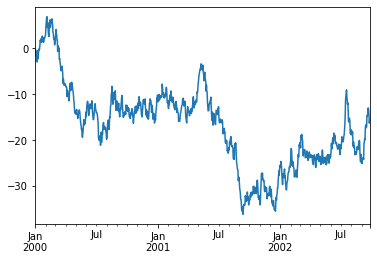

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리하다.

<Figure size 432x288 with 0 Axes>

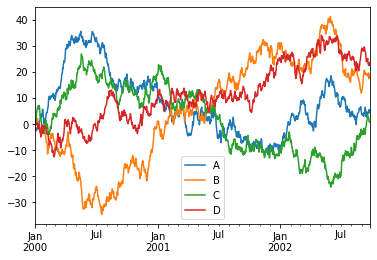

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## 12. Getting Data In / Out (데이터 입 / 출력)

**CSV**

csv 파일에 쓴다.

In [ ]:
df.to_csv('foo.csv')

csv 파일을 읽는다.

In [ ]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.029686,0.027579,0.145404,0.145855
1,2000-01-02,-2.239540,1.513306,1.630738,-0.506122
2,2000-01-03,-1.530248,1.293403,1.376174,-0.194329
3,2000-01-04,-2.491674,0.697234,1.626900,0.303869
4,2000-01-05,-2.555745,0.660367,4.321562,0.676639
...,...,...,...,...,...
995,2002-09-22,5.051978,19.618068,2.325694,22.448233
996,2002-09-23,5.509319,17.373734,1.060195,23.622497
997,2002-09-24,4.807298,18.228807,0.855399,22.592572
998,2002-09-25,5.518477,18.802967,0.872862,22.606474


**HDF5**

HDFStores에 읽고 쓴다.

HDF5 Store에 쓴다.

In [ ]:
df.to_hdf('foo.h5','df')

HDF5 Store에서 읽어온다.

In [ ]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-2.029686,0.027579,0.145404,0.145855
2000-01-02,-2.239540,1.513306,1.630738,-0.506122
2000-01-03,-1.530248,1.293403,1.376174,-0.194329
2000-01-04,-2.491674,0.697234,1.626900,0.303869
2000-01-05,-2.555745,0.660367,4.321562,0.676639
...,...,...,...,...
2002-09-22,5.051978,19.618068,2.325694,22.448233
2002-09-23,5.509319,17.373734,1.060195,23.622497
2002-09-24,4.807298,18.228807,0.855399,22.592572
2002-09-25,5.518477,18.802967,0.872862,22.606474


**Excel**

MS Excel에 읽고 쓴다.

엑셀 파일에 쓴다.

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

엑셀 파일을 읽어온다.

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-2.029686,0.027579,0.145404,0.145855
1,2000-01-02,-2.239540,1.513306,1.630738,-0.506122
2,2000-01-03,-1.530248,1.293403,1.376174,-0.194329
3,2000-01-04,-2.491674,0.697234,1.626900,0.303869
4,2000-01-05,-2.555745,0.660367,4.321562,0.676639
...,...,...,...,...,...
995,2002-09-22,5.051978,19.618068,2.325694,22.448233
996,2002-09-23,5.509319,17.373734,1.060195,23.622497
997,2002-09-24,4.807298,18.228807,0.855399,22.592572
998,2002-09-25,5.518477,18.802967,0.872862,22.606474


## 13. Gotchas (잡았다)

연산 수행 시 다음과 같은 예외 상황을 볼 수도 있다.

In [ ]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: ignored

이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 한다.

In [ ]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None


위에 대한 설명과 자세한 내용은 비교 부분을 참조하세요.

Gotchas 부분도 참조하세요.

